This notebook calculates the correlation between reflux variables and lung-gastric beta diversity and makes the respective figure.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Prepare data

In [2]:
fnjsd = '/Users/claire/github/aspiration-analysis/data/analysis/jsd.txt'

jsd = pd.read_csv(fnjsd, sep='\t').dropna(how='all', axis=1)
print(jsd.shape)
print(jsd.columns)
jsd.head()

/Users/claire/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(106030, 36)
Index([u'sample1', u'sample2', u'beta', u'site1', u'site2', u'site_comparison',
       u'patient_comp', u'subject', u'batch1', u'batch2',
       u'Results of MBS closest to enrollment date', u'Results of worst MBS',
       u'mbs_consolidated', u'ppi_consolidated', u'Patient taking PPI',
       u'Patient taking PPI?', u'ACIDSUP',
       u'Reflux - total number of episodes', u'Number of acid reflux episodes',
       u'Total number of reflux episodes (acid+non-acid)', u'SI - Reflux',
       u'SSI - Reflux', u'SAP - Reflux', u'Number of non-acid reflux episodes',
       u'percent distal nonacid', u'percent proximal total',
       u'percent distal acid', u'percent proximal acid',
       u'percent proximal nonacid', u'percent distal total',
       u'number of full colum events/total events',
       u'Number of full column episodes', u'Was Bile CA detected?',
       u'Was Bile DCA detected?', u'Was Bile LCA detected?',
       u'Was Bile TCA detected?'],
      dtype='object')


,sample1,sample2,beta,site1,site2,site_comparison,patient_comp,subject,batch1,batch2,...,percent distal acid,percent proximal acid,percent proximal nonacid,percent distal total,number of full colum events/total events,Number of full column episodes,Was Bile CA detected?,Was Bile DCA detected?,Was Bile LCA detected?,Was Bile TCA detected?
0,01-112-7GI,01-112-7RI,0.400324,gastric_fluid,rectal_swab,gastric_fluid-rectal_swab,within,01-112-7,2016,2016,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,01-112-7GI,01-112-7TI,0.993353,gastric_fluid,throat_swab,gastric_fluid-throat_swab,within,01-112-7,2016,2016,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,01-112-7GI,01-164-7GI,0.994055,gastric_fluid,gastric_fluid,gastric_fluid-gastric_fluid,between,NaN,2016,2016,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,01-112-7GI,01-164-7RI,0.575080,gastric_fluid,rectal_swab,gastric_fluid-rectal_swab,between,NaN,2016,2016,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,01-112-7GI,01-164-7TI,0.995439,gastric_fluid,throat_swab,gastric_fluid-throat_swab,between,NaN,2016,2016,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
## Metadata column edits

# Note: there are additional reflux metadata columns, but these are the
# ones with the most reliable measurements
refluxcols = ['Total number of reflux episodes (acid+non-acid)',
              'number of full colum events/total events',
              'percent proximal total',
              'percent distal total']
# Clean up the reflux cols
jsd[refluxcols] = jsd[refluxcols].replace('n/a', np.nan)
jsd[refluxcols] = jsd[refluxcols].astype(float)
# Some missing entries are wrongly entered as 1
jsd['number of full colum events/total events'] = jsd['number of full colum events/total events'].replace(1, np.nan)

# And replace nan's with "nan" strings for aspiration status
jsd['mbs_consolidated'] = jsd['mbs_consolidated'].fillna('Not tested')

In [4]:
## Only consider within-patient comparisons
jsd = jsd.query('patient_comp == "within"')

## Keep only comparisons from the same time point
jsd = jsd[
    ~(  jsd['sample1'].str.endswith('F') 
      | jsd['sample2'].str.endswith('F')
      | jsd['sample1'].str.endswith('2')
      | jsd['sample2'].str.endswith('2')
      | jsd['sample1'].str.endswith('F2T')
      | jsd['sample2'].str.endswith('F2T')
      | jsd['sample1'].str.endswith('sick')
      | jsd['sample2'].str.endswith('sick')
      | jsd['sample1'].str.startswith('05')
      | jsd['sample2'].str.startswith('05')
     )]

print(jsd.shape)

(309, 36)


In [5]:
idvars = ['sample1', 'sample2', 'beta', 'site1', 'site2', 
          'site_comparison', 'patient_comp', 'subject', 
          'batch1', 'batch2', 'mbs_consolidated']
tidyjsd = pd.melt(jsd, value_vars=refluxcols, 
                  var_name='reflux_type', value_name='reflux_value',
                  id_vars=idvars)
tidyjsd.dropna().head()

,sample1,sample2,beta,site1,site2,site_comparison,patient_comp,subject,batch1,batch2,mbs_consolidated,reflux_type,reflux_value
21,02-096-6G,02-096-6T,0.944147,gastric_fluid,throat_swab,gastric_fluid-throat_swab,within,02-096-6,2014,2014,Normal,Total number of reflux episodes (acid+non-acid),54.0
22,02-098-5B,02-098-5G,0.243337,bal,gastric_fluid,bal-gastric_fluid,within,02-098-5,2014,2014,Normal,Total number of reflux episodes (acid+non-acid),66.0
23,02-098-5B,02-098-5T,0.975509,bal,throat_swab,bal-throat_swab,within,02-098-5,2014,2014,Normal,Total number of reflux episodes (acid+non-acid),66.0
24,02-098-5G,02-098-5T,0.981589,gastric_fluid,throat_swab,gastric_fluid-throat_swab,within,02-098-5,2014,2014,Normal,Total number of reflux episodes (acid+non-acid),66.0
25,02-099-7B,02-099-7G,0.286062,bal,gastric_fluid,bal-gastric_fluid,within,02-099-7,2014,2014,Not tested,Total number of reflux episodes (acid+non-acid),25.0


# Make plot

In [6]:
asp_colors = {'Normal': '#B25116', 'Aspiration/Penetration': '#FB84D1', 'Not tested': '#C9C9C9'}
hue_order = ['Normal', 'Aspiration/Penetration', 'Not tested']

# Only interested in the bal-gastric relationship
toplot = tidyjsd.query('site_comparison == "bal-gastric_fluid"')

# And drop any samples without the reflux actually measured
toplot = toplot.dropna(subset=['beta', 'reflux_value'])

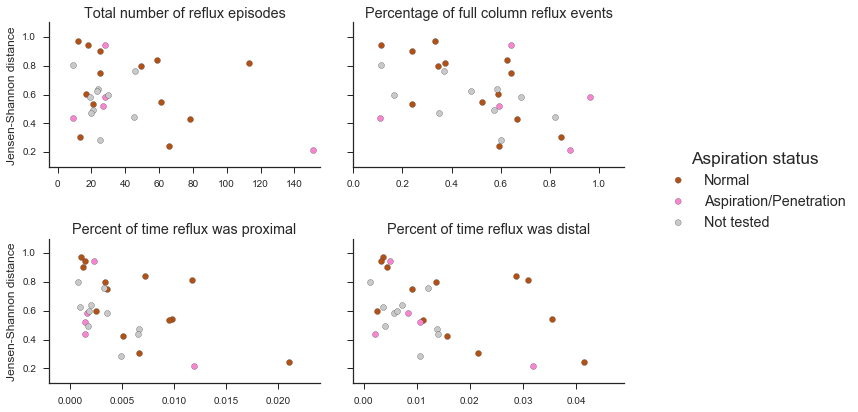

In [7]:
sns.set_style('ticks')
g = sns.FacetGrid(
    data=toplot, 
    col='reflux_type', col_wrap=2, 
    hue='mbs_consolidated', hue_order=hue_order,
    sharex=False, legend_out=True, palette=asp_colors,
    aspect=1.5)
scatter_kwargs = {'s' : 35, 'edgecolors': '0.25'}
g.map(plt.scatter, 'reflux_value', 'beta', **scatter_kwargs).set_titles("{col_name}")

# Axes limits
g.facet_axis(0, 0).set_xlim([-5, 155])
g.facet_axis(0, 1).set_xlim([0, 1.1])
g.facet_axis(0, 2).set_xlim([-0.002, 0.024])
g.facet_axis(0, 3).set_xlim([-0.002, 0.049])

# X and Y axis labels
g.facet_axis(0, 0).set_ylabel('Jensen-Shannon distance', fontsize='large')
g.facet_axis(0, 2).set_ylabel('Jensen-Shannon distance', fontsize='large')

g.facet_axis(0, 2).set_xlabel('')
g.facet_axis(0, 3).set_xlabel('')

# Legend, anchored to top right axis
lgd = g.facet_axis(0, 1)\
    .legend(bbox_to_anchor=(1.1, 0.2), 
            loc='upper left', fontsize='x-large')
lgd.set_title('Aspiration status', prop={'size': 'xx-large'})

# Titles
title_kwargs = {'fontsize': 'x-large'}
g.facet_axis(0, 0).set_title('Total number of reflux episodes', **title_kwargs)
g.facet_axis(0, 1).set_title('Percentage of full column reflux events', **title_kwargs)
g.facet_axis(0, 2).set_title('Percent of time reflux was proximal', **title_kwargs)
g.facet_axis(0, 3).set_title('Percent of time reflux was distal', **title_kwargs)

sns.plt.subplots_adjust(hspace=0.5)

sns.plt.savefig('../../final/figures/figure5.reflux_correlations.png', 
                bbox_inches='tight', bbox_extra_artists=(lgd,))

# Calculate correlations

In [8]:
from scipy.stats import spearmanr, pearsonr

## Spearman correlation
for r, subdf in toplot.groupby('reflux_type'):
    print(r, spearmanr(subdf['reflux_value'], subdf['beta']))

('Total number of reflux episodes (acid+non-acid)', SpearmanrResult(correlation=-0.14299417611920817, pvalue=0.46790021918957314))
('number of full colum events/total events', SpearmanrResult(correlation=-0.40810182399417028, pvalue=0.031093111623939913))
('percent distal total', SpearmanrResult(correlation=-0.43185550082101803, pvalue=0.021743476804688581))
('percent proximal total', SpearmanrResult(correlation=-0.47181171319102355, pvalue=0.011252594822857453))


In [9]:
## Pearson correlation of the log
for r, subdf in toplot.groupby('reflux_type'):
    print(r, pearsonr(np.log10(subdf['reflux_value']), np.log10(subdf['beta'])))

('Total number of reflux episodes (acid+non-acid)', (-0.25063712089647588, 0.19829296614422887))
('number of full colum events/total events', (-0.39691907250760855, 0.036498767096272748))
('percent distal total', (-0.44820976514731448, 0.01675555179963855))
('percent proximal total', (-0.54594538078475363, 0.00265374780252163))


# Patients

Get the list of patients used in making this figure

In [10]:
toplot.dropna().groupby(['reflux_type', 'mbs_consolidated']).size()

reflux_type                                      mbs_consolidated      
Total number of reflux episodes (acid+non-acid)  Aspiration/Penetration     5
                                                 Normal                    13
                                                 Not tested                10
number of full colum events/total events         Aspiration/Penetration     5
                                                 Normal                    13
                                                 Not tested                10
percent distal total                             Aspiration/Penetration     5
                                                 Normal                    13
                                                 Not tested                10
percent proximal total                           Aspiration/Penetration     5
                                                 Normal                    13
                                                 Not tested           

In [11]:
toplot['subject'].unique().shape

(28,)

In [12]:
# A note for this file: I used bal and gastric samples from these patients
with open('../../final/patients/figure5.reflux_correlation.subjects.txt', 'w') as f:
    f.write('\n'.join(toplot['subject'].unique()) + '\n')